# Census Income Prediction

## Introduction About the Data

Prediction task is to determine whether a person makes over 50K a year. (Classification Analysis)

There are 14 Independent Variables.

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Target Varibale:
- income: >50K, <=50K.

Dataset Source Link : https://archive.ics.uci.edu/ml/datasets/census+income

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/clean_censusincome')

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
data.rename(columns={'class': 'income_class'},inplace=True)

In [5]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [6]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x1bde18187f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bde1818d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bde1818520>],
 'medians': [<matplotlib.lines.Line2D at 0x1bde1838370>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bde1838640>],
 'means': []}

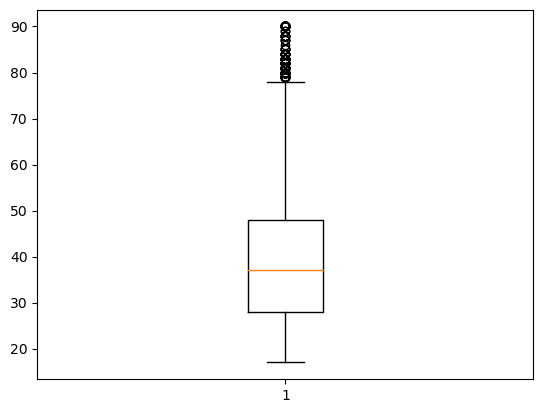

In [5]:
plt.boxplot(data['age'])

In [6]:
data[data['age'] > 80]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
222,90,Private,51744.0,HS-grad,9.0,Never-married,Other-service,Not-in-family,Black,Male,0.0,2206.0,40.0,United-States,<=50K
918,81,Self-emp-not-inc,136063.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,30.0,United-States,<=50K
1040,90,Private,137018.0,HS-grad,9.0,Never-married,Other-service,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
1168,88,Self-emp-not-inc,206291.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1935,90,Private,221832.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47631,88,Private,30102.0,Bachelors,13.0,Never-married,Exec-managerial,Not-in-family,White,Male,0.0,1816.0,50.0,United-States,<=50K
47941,89,Private,29106.0,10th,6.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,20.0,United-States,<=50K
48467,84,Private,65478.0,HS-grad,9.0,Widowed,Priv-house-serv,Not-in-family,White,Female,0.0,0.0,40.0,England,<=50K
48638,83,Private,192305.0,Some-college,10.0,Divorced,Prof-specialty,Unmarried,White,Female,0.0,0.0,20.0,United-States,<=50K


{'whiskers': [<matplotlib.lines.Line2D at 0x1bde1891760>,
 'caps': [<matplotlib.lines.Line2D at 0x1bde1891d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bde1891490>],
 'medians': [<matplotlib.lines.Line2D at 0x1bde189e2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bde189e5b0>],
 'means': []}

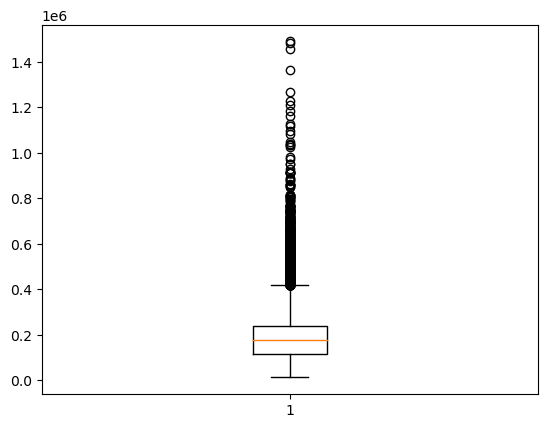

In [7]:
plt.boxplot(data['fnlwgt'])

In [8]:
len(data['fnlwgt'] > 0.4)

48813

{'whiskers': [<matplotlib.lines.Line2D at 0x1bde1900c70>,
 'caps': [<matplotlib.lines.Line2D at 0x1bde190e250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bde19009a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bde190e7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bde190eac0>],
 'means': []}

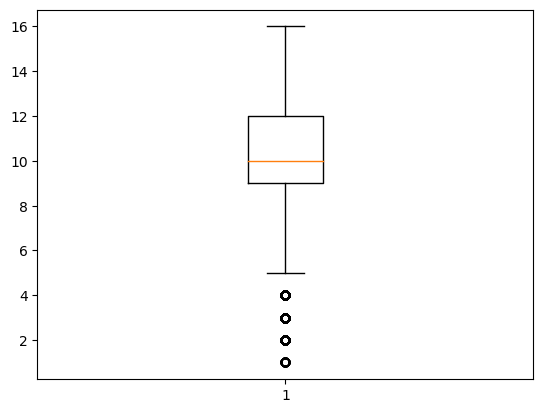

In [9]:
plt.boxplot(data['education-num'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bde1969e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1bde1978460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bde1969bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bde1978a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bde1978cd0>],
 'means': []}

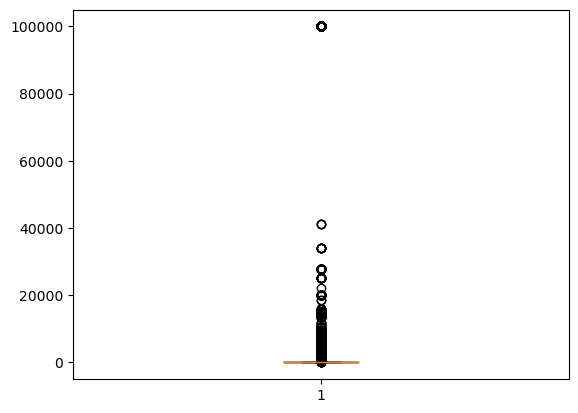

In [10]:
plt.boxplot(data['capital-gain'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bde1a8d040>,
 'caps': [<matplotlib.lines.Line2D at 0x1bde1a8d5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bde1a7cd30>],
 'medians': [<matplotlib.lines.Line2D at 0x1bde1a8db80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bde1a8de50>],
 'means': []}

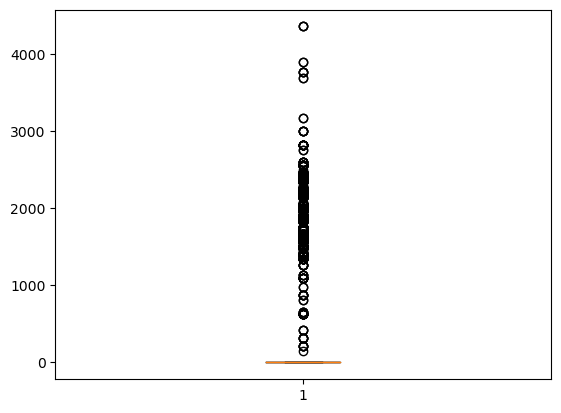

In [11]:
plt.boxplot(data['capital-loss'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bde1ae0be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bde1af21c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bde1ae0910>],
 'medians': [<matplotlib.lines.Line2D at 0x1bde1af2760>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bde1af2a30>],
 'means': []}

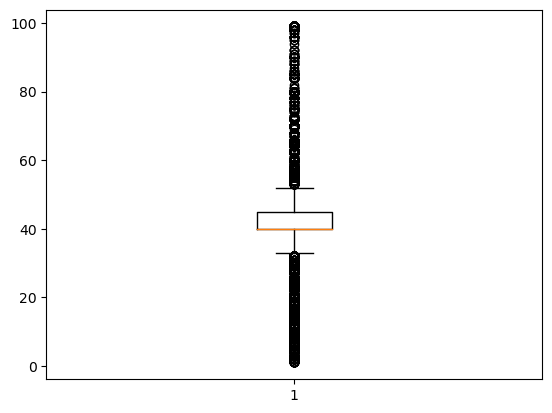

In [12]:
plt.boxplot(data['hours-per-week'])

In [8]:
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
print(numerical_features)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [14]:
#This is for a show distributin and QQPlot diagram
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
import seaborn as sns
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample,kde=True)
    plt.subplot(1,2,2)
    stat.probplot(sample,plot=pylab)
    plt.show()

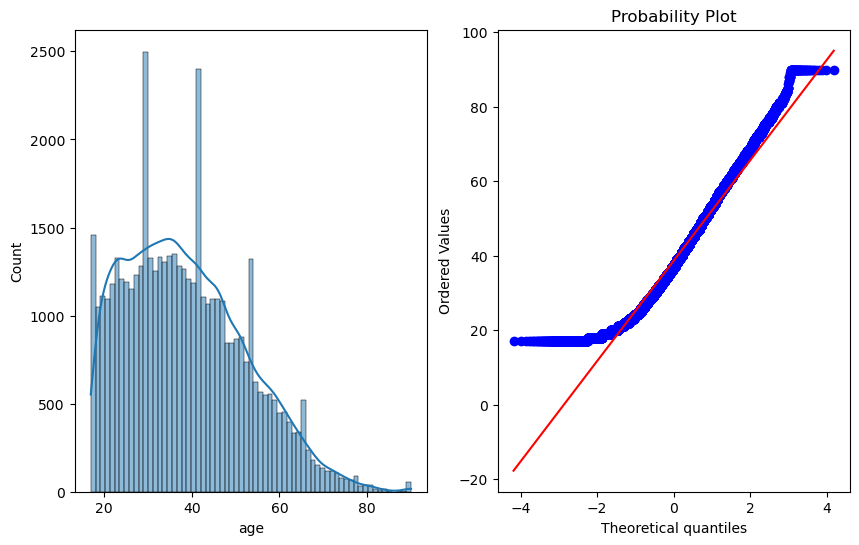

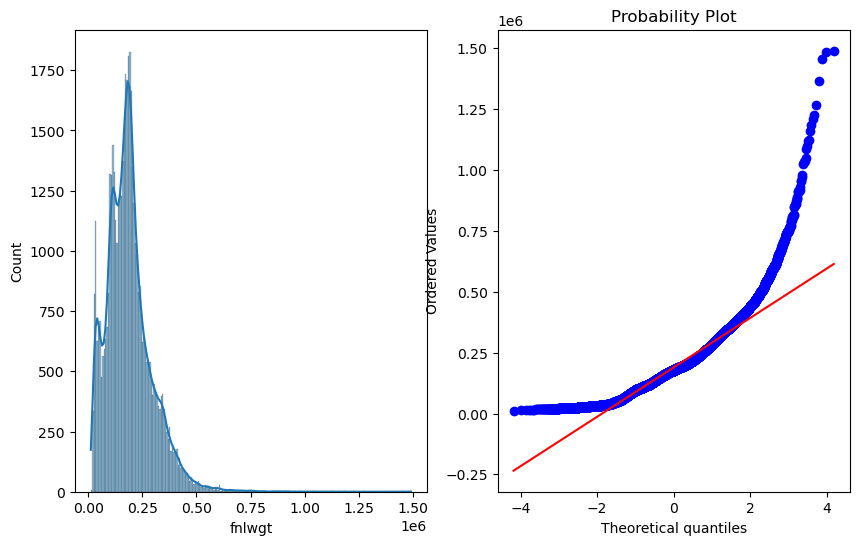

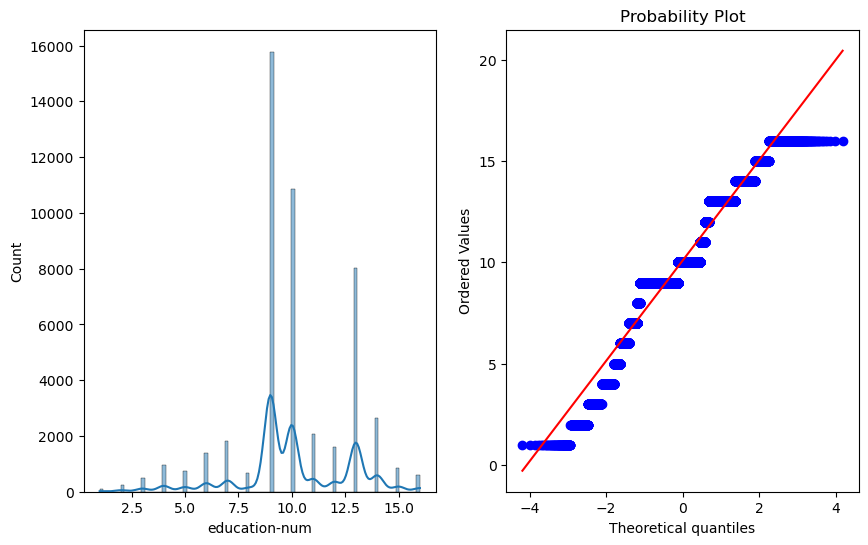

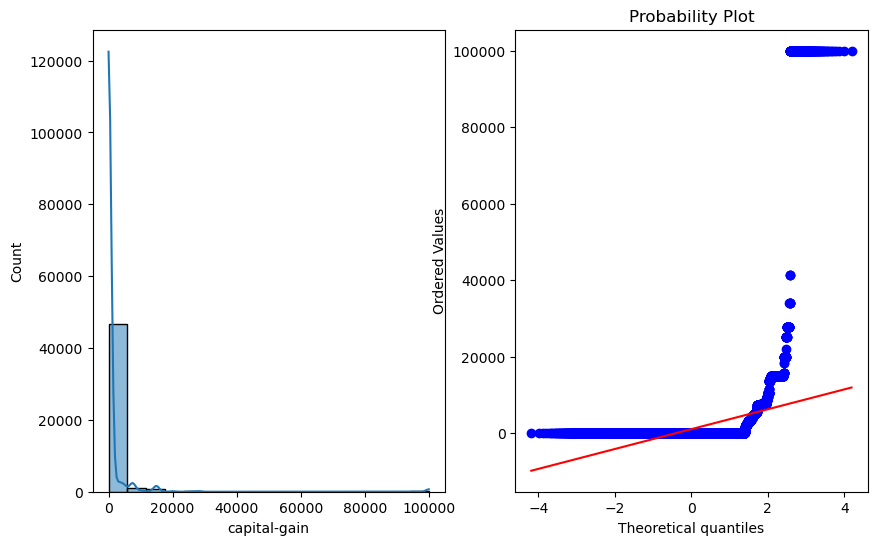

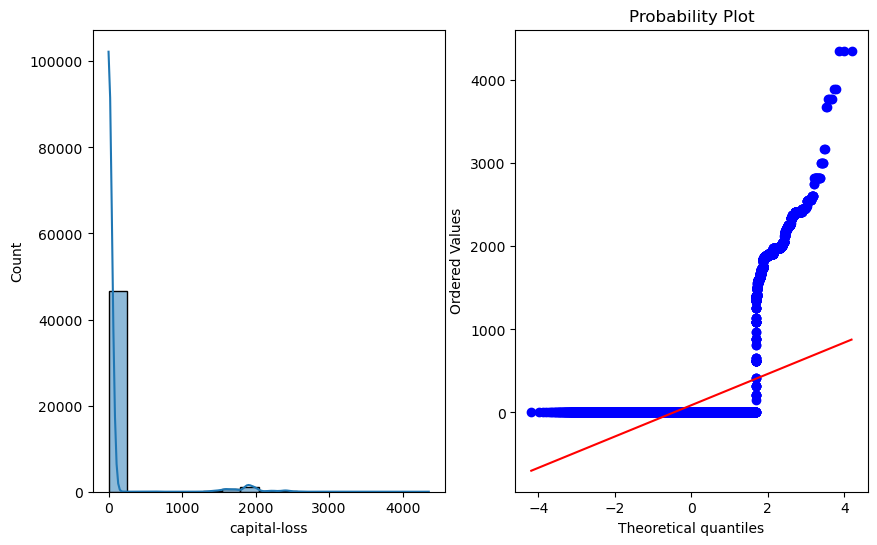

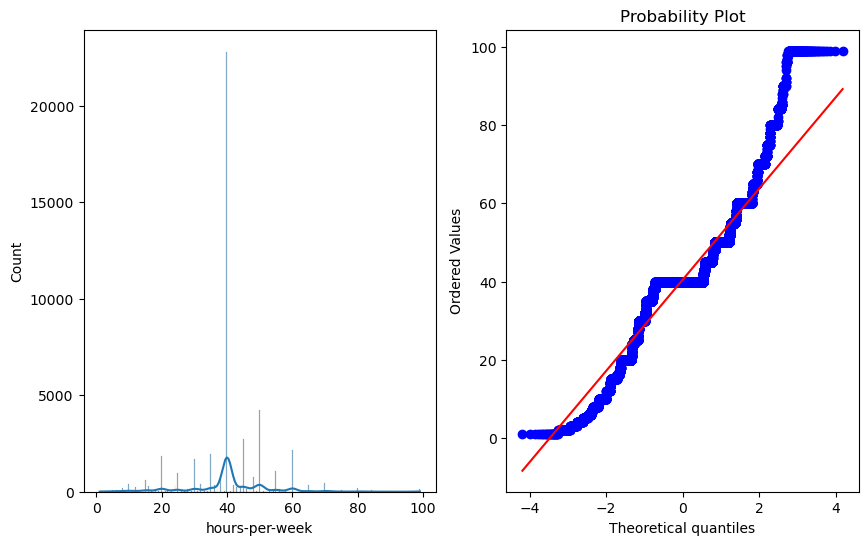

In [15]:
for i in numerical_features:
    plot_data(data[i])

#### Observation:

1. The age and fnlwgt column is sightly right-skewed or postively skewed.
2. Capital gain and capital loss are mostly 0
3. In 'hours-per-week' column, most datapoints are concentrated on 40.

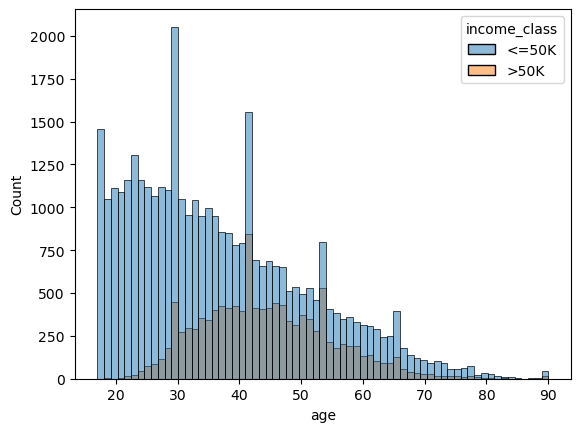

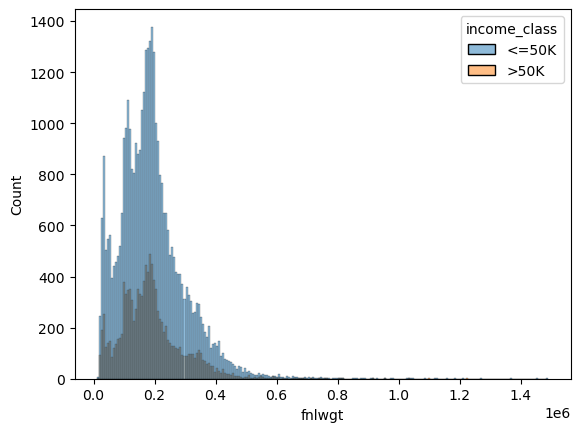

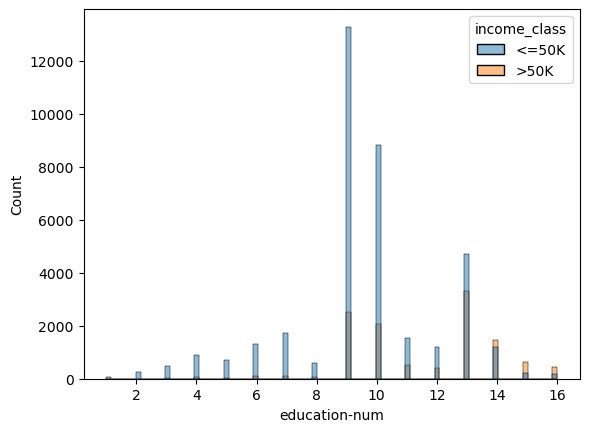

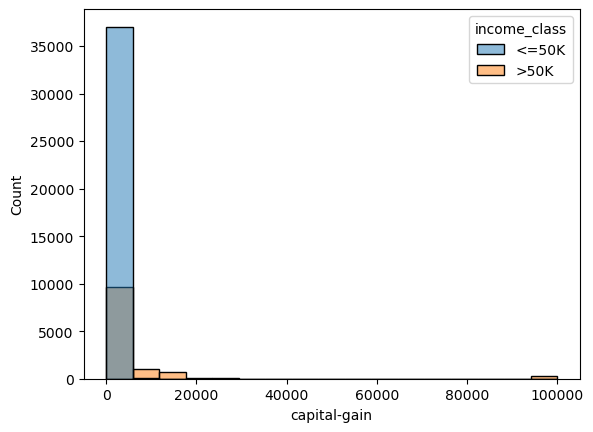

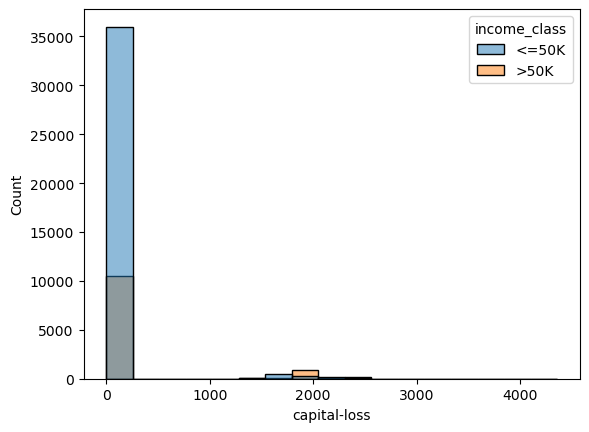

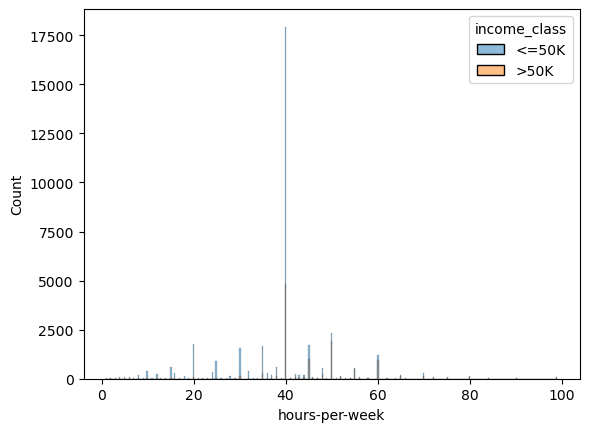

<Figure size 640x480 with 0 Axes>

In [10]:
import seaborn as sns
for feature in numerical_features:
    sns.histplot(data,x=feature,hue='income_class')
    plt.show()

plt.tight_layout()

#### Observation:

1. In 'age' column, most of the people earning >50K follows a different distribution than overall 'age' column distribution.
2. People with higher-education, are earning more income.
3. More the capital-gain, more income(>50K).

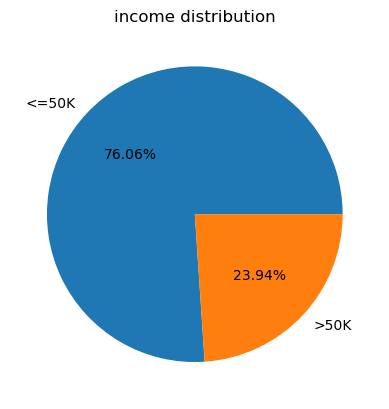

In [11]:
## distribution of our terget varibale -> income
income = data['income_class'].value_counts()

plt.pie(income,labels=income.index,autopct="%1.2f%%")
plt.title("income distribution")
plt.show()

#### Observation:

People with <=50K income: 76.06%

People with >50K income: 23.94%

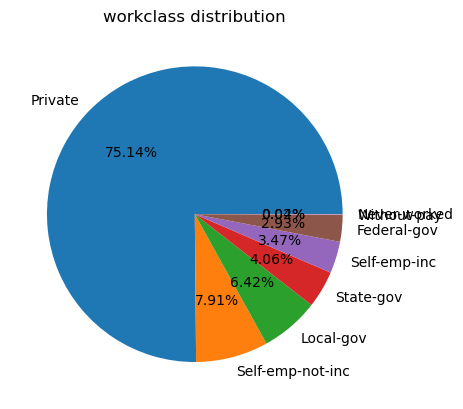

In [12]:
## Distribution of workclass column
temp = data['workclass'].value_counts()

plt.pie(temp,labels=temp.index,autopct="%1.2f%%")
plt.title("workclass distribution")
plt.show()

In [13]:
## Relationship between workclass and income

workclass = data.groupby('workclass')['income_class']

workclass.value_counts()

workclass         income_class
Federal-gov       <=50K             871
                  >50K              561
Local-gov         <=50K            2209
                  >50K              927
Never-worked      <=50K              10
Private           <=50K           29028
                  >50K             7650
Self-emp-inc      >50K              938
                  <=50K             756
Self-emp-not-inc  <=50K            2784
                  >50K             1077
State-gov         <=50K            1451
                  >50K              530
Without-pay       <=50K              19
                  >50K                2
Name: income_class, dtype: int64

<AxesSubplot:xlabel='workclass', ylabel='count'>

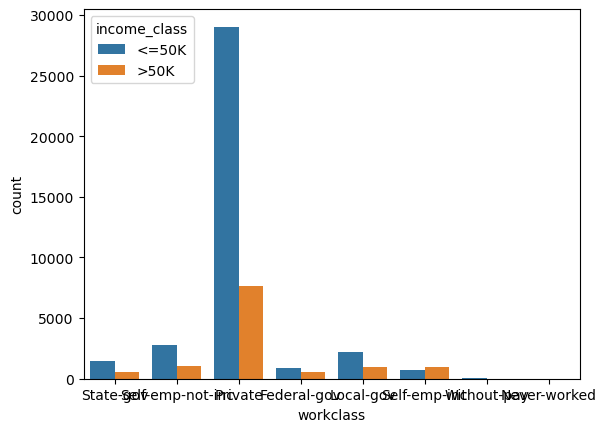

In [14]:

sns.countplot(data=data, x='workclass', hue='income_class')

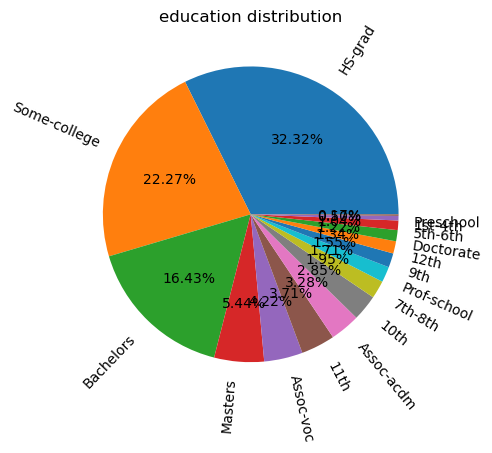

In [24]:
## distribution of education feature

education = data['education'].value_counts()

plt.pie(education,labels=education.index,autopct="%1.2f%%",rotatelabels=True)
plt.title("education distribution")
plt.show()

In [16]:
## Relationship between education and income feature

edu_income = data.groupby('education')['income_class']
edu_income.value_counts()

education     income_class
10th          <=50K            1302
              >50K               87
11th          <=50K            1720
              >50K               92
12th          <=50K             608
              >50K               48
1st-4th       <=50K             237
              >50K                8
5th-6th       <=50K             481
              >50K               27
7th-8th       <=50K             892
              >50K               62
9th           <=50K             715
              >50K               41
Assoc-acdm    <=50K            1188
              >50K              413
Assoc-voc     <=50K            1538
              >50K              522
Bachelors     <=50K            4707
              >50K             3313
Doctorate     >50K              431
              <=50K             163
HS-grad       <=50K           13275
              >50K             2502
Masters       >50K             1459
              <=50K            1197
Preschool     <=50K              81
 

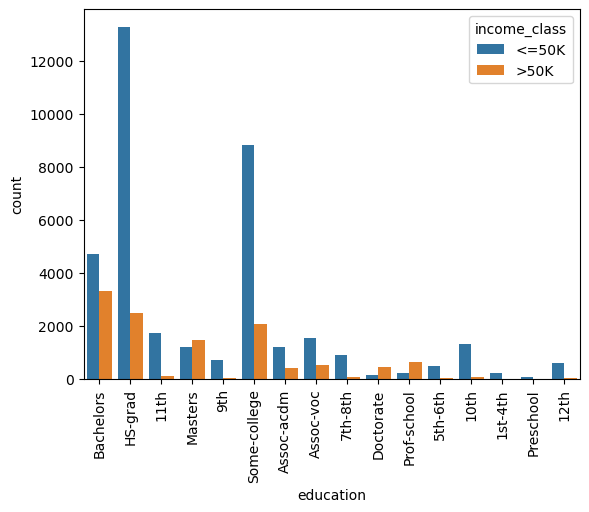

In [17]:
sns.countplot(data=data,x='education',hue='income_class')
plt.xticks(rotation=90)
plt.show()

#### Observation:

1. In Bachelors, HS-grad, Masters, Doctorate, Prof-school there are more people who are earning money more than 50K.
2. In Master, doctorate and Prof-school - the number of people with income >50K is greater than the number of people with income <=50K

In [18]:
## Relationship between marital-status and income feature
marital_status_income = data.groupby('marital-status')['income_class']

In [21]:
marital_status_income.value_counts()

marital-status         income_class
Divorced               <=50K            5959
                       >50K              671
Married-AF-spouse      <=50K              23
                       >50K               14
Married-civ-spouse     <=50K           12390
                       >50K             9982
Married-spouse-absent  <=50K             570
                       >50K               58
Never-married          <=50K           15365
                       >50K              733
Separated              <=50K            1431
                       >50K               99
Widowed                <=50K            1390
                       >50K              128
Name: income_class, dtype: int64

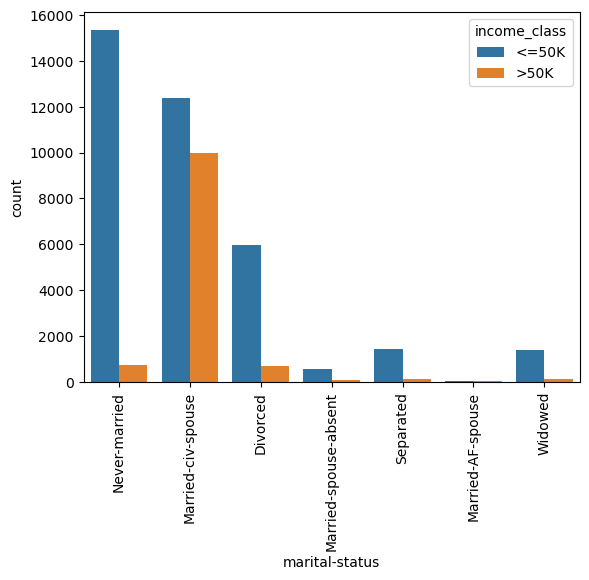

In [24]:
sns.countplot(data=data,x='marital-status',hue='income_class')
plt.xticks(rotation=90)
plt.show()

#### Observation:

1. Most of the people earning >50K are Married-civ-spouse
2. Most of the people earning <=50K are Never-married
3. The differnece between two income groups in Never-married column is very high.

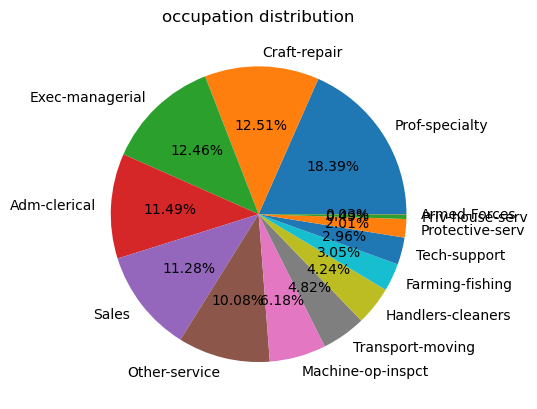

In [25]:
## Distribution of Occupation feature

occupation = data['occupation'].value_counts()

plt.pie(occupation,labels=occupation.index,autopct="%1.2f%%")
plt.title("occupation distribution")
plt.show()

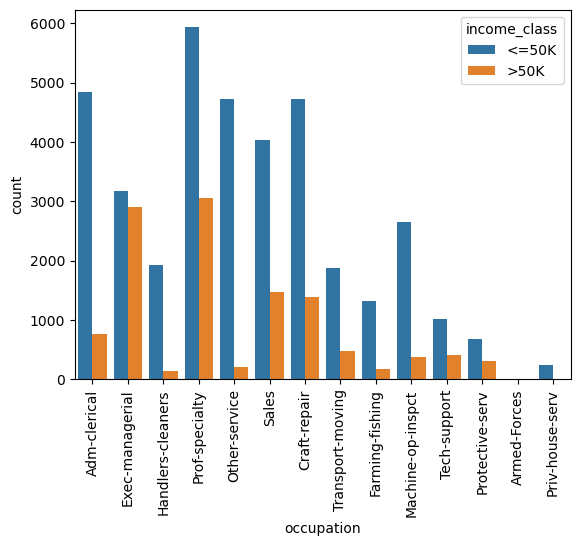

In [26]:
# relationship between occupation and income feature
sns.countplot(data=data,x='occupation',hue='income_class')
plt.xticks(rotation=90)
plt.show()

#### Observation:

1. More People are earning >50K in Exec-managerial and Prof-speciality than other groups.

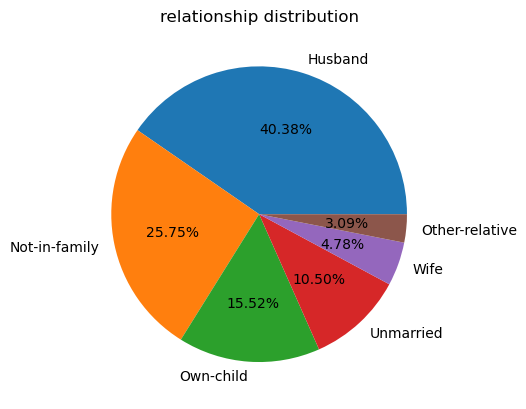

In [27]:
## Distribution of relationship feature

relationship = data['relationship'].value_counts()

plt.pie(relationship,labels=relationship.index,autopct="%1.2f%%")
plt.title("relationship distribution")
plt.show()

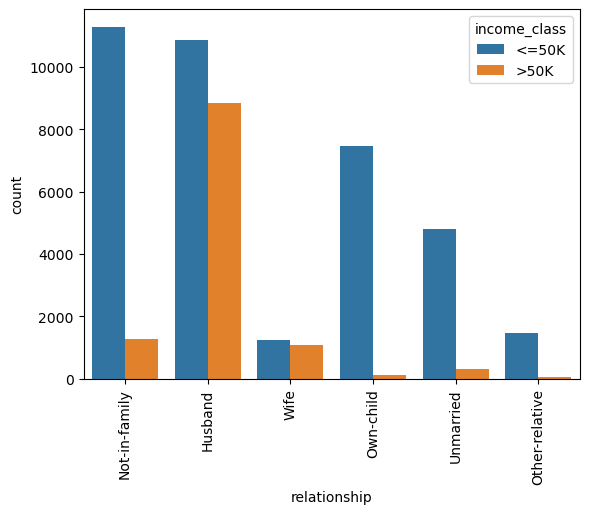

In [28]:
# relationship between relationship and income feature
sns.countplot(data=data,x='relationship',hue='income_class')
plt.xticks(rotation=90)
plt.show()

#### Observation:

1. In relationship column, 40.38% are husband.
2. Husbands are more likely to earn >50K than others.

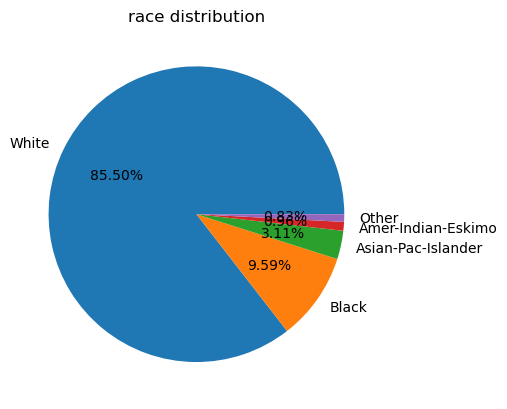

In [29]:
## Distribution of race feature

race = data['race'].value_counts()

plt.pie(race,labels=race.index,autopct="%1.2f%%")
plt.title("race distribution")
plt.show()

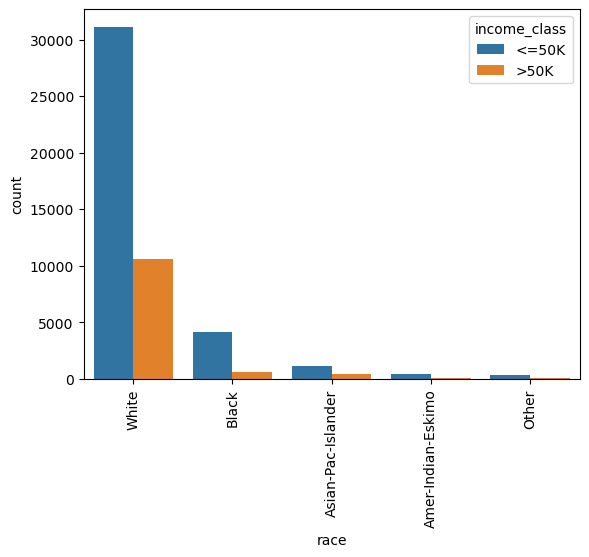

In [30]:
# relationship between race and income feature
sns.countplot(data=data,x='race',hue='income_class')
plt.xticks(rotation=90)
plt.show()

#### Observation:

1. in race column, maximum people are White.
2. White people are more likely to earn income of >50K.

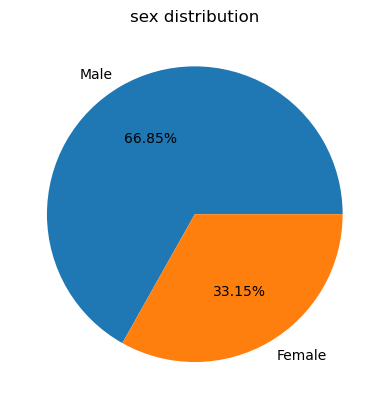

In [31]:
## Distribution of sex feature

sex = data['sex'].value_counts()

plt.pie(sex,labels=sex.index,autopct="%1.2f%%")
plt.title("sex distribution")
plt.show()

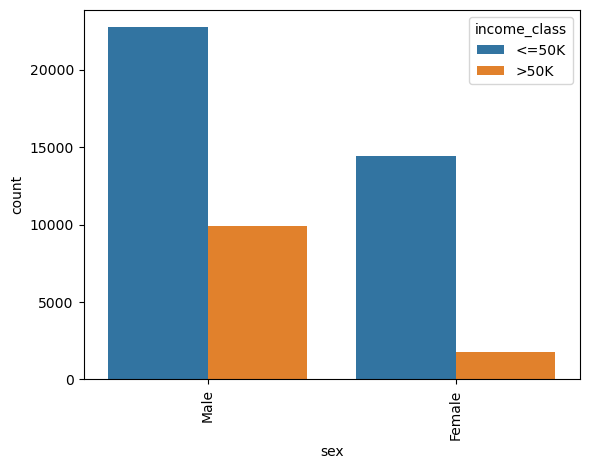

In [32]:
# relationship between sex and income feature
sns.countplot(data=data,x='sex',hue='income_class')
plt.xticks(rotation=90)
plt.show()

#### Observation:

1. More male(66.85%) than female(33.15%) in sex column
2. Males are more likely to earn >50K than females.

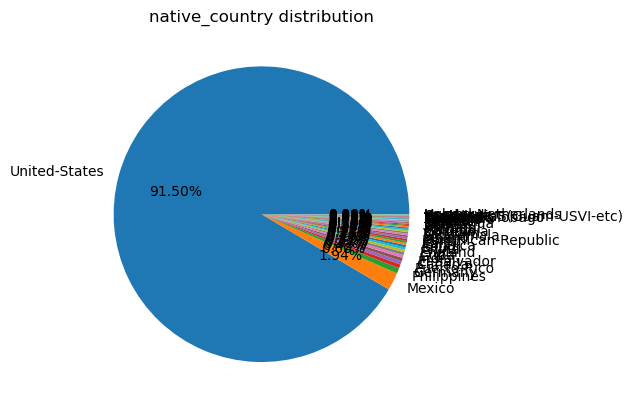

In [33]:
## Distribution of native-country feature

native_country = data['native-country'].value_counts()

plt.pie(native_country,labels=native_country.index,autopct="%1.2f%%")
plt.title("native_country distribution")
plt.show()

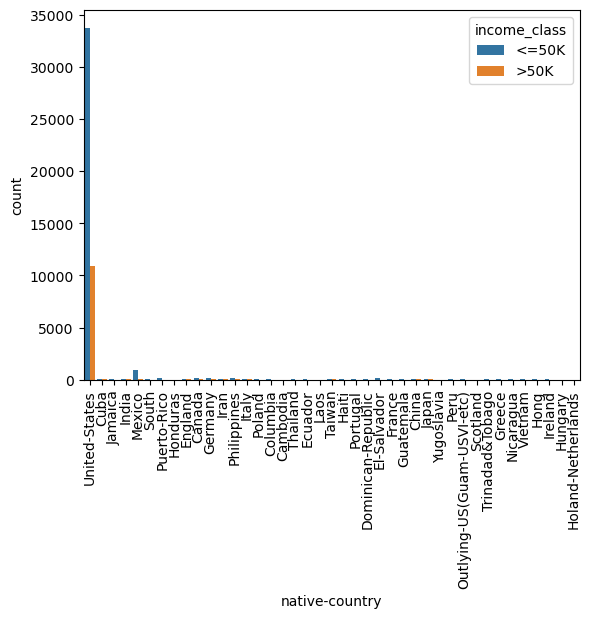

In [34]:
# relationship between native-country and income feature
sns.countplot(data=data,x='native-country',hue='income_class')
plt.xticks(rotation=90)
plt.show()

#### Observation:

1. Total 41 unique countries are present.
2. Most datapoints(91.50%) are from united States.

# Feature Engineering

In [1]:
import pandas as pd
data = pd.read_csv("data/clean_censusincome")

In [2]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [3]:
data['class'].unique()

array(['<=50K', '>50K'], dtype=object)

In [4]:
#Handling Target Variable
data['class'] = data['class'].str.replace('<=50K','0')
data['class'] = data['class'].str.replace('>50K','1')

In [5]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


In [6]:
data['class'].unique()

array(['0', '1'], dtype=object)

In [7]:
data['class'] = data['class'].astype(int)

In [12]:
data['class'].dtype

dtype('int32')

In [9]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [10]:
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
print(numerical_features)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'class']


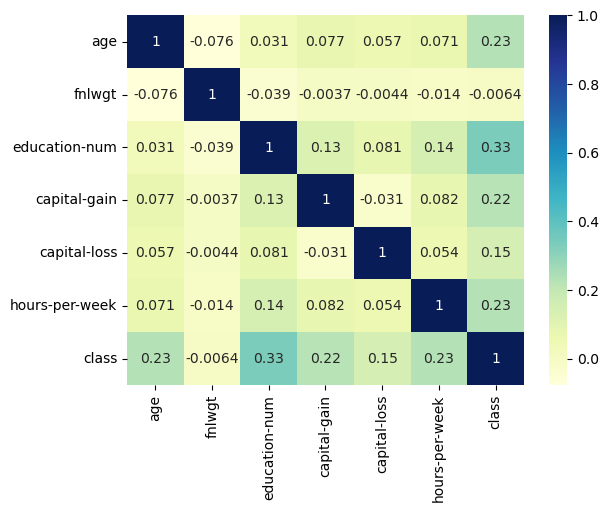

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64','int32'])

# Create the correlation matrix
corr_matrix = numeric_data.corr()

# Create the heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

In [14]:
data.rename(columns={'class': 'income_class'},inplace=True)

In [15]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


In [16]:
data.drop(labels=['fnlwgt','capital-loss'],axis=1,inplace=True)

In [17]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,hours-per-week,native-country,income_class
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,40.0,United-States,0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,13.0,United-States,0
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,40.0,United-States,0
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,40.0,United-States,0
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,40.0,Cuba,0


In [18]:
data.to_csv("data/clean_censusincome",index=False)